---
title: "Assignment 1 - Stock Data Analysis"
author: "Barry, Bella, Emma, Maxim, Robin" 
date: "2025-09-xx"
format: pdf
---

\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

# Preparations
Before messing around with the stock data, the environment should install and load the dplyr and lubridate packages to perform easier data analysis.

In [ ]:
# installation
install.packages("dplyr")
install.packages("lubridate")
install.packages("ggplot2")

After installing them, the packages are loaded in.

In [ ]:
#| warning: false
library(dplyr)
library(lubridate)
library(ggplot2)

Data Analysis
<br> Now let's start actually processing and transforming the stock data.
First of all, the data must be *read* into existence, so that it becomes a workable dataframe. 
<br> Also to ensure correct formatting, the `datadate` variable is adjusted to the standard date format. 

In [5]:
# load csv file as stock_data but clean the date format
stock_data = read.csv("compustat_food_bev.csv")
stock_data$datadate = as.Date(stock_data$datadate, format = "%d/%m/%Y")

With the stock data in place, only the relevant data set gets filtered out. Our team will focus on the following tickers:
+ SBUX (Starbucks)
+ WEN (Wendy's)
+ PBPB (Potbelly)
+ CMG (Chipotle)
+ DPZ (Domino's Pizza)

## SBUX (Starbucks)

In [55]:
# ── Pick ticker & prepare base frame -------------------------------------
stock_data_sbux <- stock_data %>%
  filter(tic == "SBUX") %>%
  arrange(datadate)

Inbefore tackling the tasks, some new columns must be created.
<br> These are going to be loaded in using the _mutate()_ function with metrics such as the daily returns, overnight returns, volume change and MFV of our stock data. <br> This approach is the same for each ticker.

In [61]:
# ── Features 1–6 --------------------------------------------------------
stock_data_sbux <- stock_data_sbux %>%
  arrange(datadate) %>%
  mutate(
    # 1) daily return
    return_daily   = (prccd - lag(prccd)) / lag(prccd),
    # 2) 10-day momentum
    momentum_10day = prccd - lag(prccd, 10),
    # 3) daily range
    range_daily    = prchd - prcld,
    # 4) MFV (guard against divide-by-zero)
    MFV = if_else(range_daily == 0 | is.na(range_daily),
                  NA_real_,
                  (((prccd - prcld) - (prchd - prccd)) / range_daily) * cshtrd),
    # 5–6) month & year (use new names to avoid clash with year())
    month_num = lubridate::month(datadate),
    year_num  = lubridate::year(datadate)
  )

Next, we perform some broader analysis.

In [71]:
# 7) Total trading volume in June 2023
trad_vol_jun23 <- stock_data_sbux %>%
  filter(year_num == 2023, month_num == 6)
total_volume <- sum(trad_vol_jun23$cshtrd, na.rm = TRUE)
print(paste("The total trading volume in June 2023 was",
            total_volume, "shares"))

# 8) Mean daily return over the entire period
mean_daily_return <- mean(stock_data_sbux$return_daily, na.rm = TRUE)
print(paste("The mean daily return over the entire period was",
            round(mean_daily_return*100, 2), "%"))

# 9. Day with largest positive high price
largest_high_price <- filter(stock_data_sbux, prchd == max(prchd, na.rm = TRUE))
print(paste("The day with the largest high price was on",
            largest_high_price$datadate,
            "with a price of", largest_high_price$prchd))

# https://investor.starbucks.com/news/financial-releases/news-details/2021/Starbucks-Reports-Record-Q3-Fiscal-2021-Results/default.aspx
# Corporate context: Starbucks Q3 FY21 earnings (announced July 27, 2021) reported record revenue.
print("This spike was likely driven by investor optimism ahead of record Q3 earnings, released on July 27, 2021.")

# 10. Day with the largest positive daily return
largest_daily_return <- filter(stock_data_sbux, return_daily == max(return_daily, na.rm = TRUE))
print(paste("The day with the largest daily return occurred on",
            largest_daily_return$datadate,
            "at", round(largest_daily_return$return_daily*100, 2), "%"))

# https://investor.starbucks.com/news/financial-releases/news-details/2022/Starbucks-Reports-Q2-Fiscal-2022-Results/default.aspx
# Corporate context: Starbucks Q2 FY22 earnings (announced May 3, 2022) showed strong revenue growth.
print("This jump was driven by Starbucks' Q2 FY22 earnings release on May 3, 2022, which beat expectations.")

highest_return_SBUX = stock_data_sbux$return_daily[which.max(stock_data_sbux$return_daily)]*100

[1] "The total trading volume in June 2023 was 151045270 shares"
[1] "The mean daily return over the entire period was 0.03 %"
[1] "The day with the largest high price was on 2021-07-23 with a price of 126.32"
[1] "This spike was likely driven by investor optimism ahead of record Q3 earnings, released on July 27, 2021."
[1] "The day with the largest daily return occurred on 2022-05-04 at 9.83 %"
[1] "This jump was driven by Starbucks' Q2 FY22 earnings release on May 3, 2022, which beat expectations."


## WEN (Wendy's)

In [58]:
# construct new data table with stock data exclusively tied to Wendy's
stock_data_wen = filter(stock_data, tic=="WEN")

New columns must be created.

In [ ]:
# ── Features 1–6 --------------------------------------------------------
stock_data_wen <- stock_data_wen %>%
  arrange(datadate) %>%
  mutate(
    # 1) daily return
    retd = (prccd/lag(prccd))-1,
    # 2) overnight return
    retov = (prcod/lag(prccd))-1,
    # 3) volume change
    volch = (cshtrd/lag(cshtrd))-1,
    # 4) MFV (guard against divide-by-zero)
    mfv = ((prccd-prcld)-(prchd-prcld))/(prchd-prcld),
    # 5–6) month & year (use new names to avoid clash with year())
    mon = month(datadate),
    yr  = year(datadate)
  )

More analysis.

In [72]:
# 7) Calculate the total trading volume, in June 2023.
tv0623 = sum(stock_data_wen$cshtrd[
    stock_data_wen$mon == 6 & stock_data_wen$yr==2023
    ])
print(paste("The total trading volume in June 2023 was",
            tv0623, "shares"))

# 8) Mean daily return over the entire period
return_daily_mean = mean(stock_data_wen$retd, na.rm = TRUE)
print(paste("The mean daily return over the entire period was",
            round(return_daily_mean*100, 2), "%"))

# 9. Day with largest positive high price
date_highest_high = stock_data_wen$datadate[
    which.max(stock_data_wen$prchd)
    ]
price_highest = stock_data_wen$prchd[which.max(stock_data_wen$prchd)]
print(paste("The day with the largest high price was on",
            date_highest_high,
            "with a price of", price_highest))

# 10. Day with the largest positive daily return
date_highest_daily_return = stock_data_wen$datadate[
    which.max(stock_data_wen$retd)
    ]
retd_highest_p = stock_data_wen$retd[which.max(stock_data_wen$retd)]
print(paste("The day with the largest daily return occurred on",
            date_highest_daily_return,
            "at", round(retd_highest_p*100, 2), "%"))

[1] "The total trading volume in June 2023 was 54557454 shares"
[1] "The mean daily return over the entire period was 0.01 %"
[1] "The day with the largest high price was on 2021-06-08 with a price of 29.46"
[1] "The day with the largest daily return occurred on 2021-06-08 at 25.85 %"


## PBPB (Potbelly)

In [73]:
#head(stock_data)
stock_data_PBPB <- filter(stock_data, tic == "PBPB")

Create the columns.

In [ ]:



#adding returns
stock_data_PBPB <- mutate(stock_data_PBPB, return = prccd/lag(prccd,1)-1)
#ading overnight returns
stock_data_PBPB <- mutate(stock_data_PBPB, return_ovn = prcod/lag(prccd,1)-1)
#adding price delta intraday
stock_data_PBPB <- mutate(stock_data_PBPB, px_delta_intra = prchd-prcld)
#adding Money FLow Volume Indicator (MFV)
stock_data_PBPB <- mutate(stock_data_PBPB, MFV = ((prccd-prcld)-(prchd-prccd))/px_delta_intra)
#head(stock_data_PBPB)

#adding the month (lubridate already part of tidyverse)

stock_data_PBPB <- mutate(stock_data_PBPB, Month = month(datadate))
stock_data_PBPB <- mutate(stock_data_PBPB, Year = year(datadate))
#head(stock_data_PBPB)

##display specific trading metrics
#Volume traded in June 2023
trad_vol_jun23 <- filter(stock_data_PBPB, Month == 6 & Year == 2023)
head(trad_vol_jun23)
print(paste(sum(trad_vol_jun23$cshtrd), " Total Common Shares Traded in June 2023"))

#Average return over entire period
mean_daily_return <- mean(stock_data_PBPB$return, na.rm = TRUE)
print(paste("The mean Daily Return during the entire peroid was ", round(mean_daily_return*100, 2),"%"))

#Day with largest positive high price

largest_high_price <- filter(stock_data_PBPB, prchd == max(prchd))
head(largest_high_price)
print(paste("The day wiht the largest high price was on", largest_high_price$datadate, "with a price of", largest_high_price$prchd))

#Day with the largest positive daily return



largest_daily_return_date_PBPB = stock_data_PBPB$datadate[
    which.max(stock_data_PBPB$return)
    ]

largest_daily_return_PBPB = stock_data_PBPB$return[which.max(stock_data_PBPB$return)]*100
print(paste("The Day with the largest daily return occured on", largest_daily_return_date_PBPB, "at", round(largest_daily_return_PBPB, 2), "%"))



,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return,return_ovn,px_delta_intra,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18839,1,2023-06-01,PBPB,POTBELLY CORP,115522,7.98,8.05,7.7700,7.78,14,5812,0.02570694,0.000000000,0.2800,0.50000000,6,2023
2,18839,1,2023-06-02,PBPB,POTBELLY CORP,152263,8.32,8.41,8.0500,8.08,14,5812,0.04260652,0.012531328,0.3600,0.50000000,6,2023
3,18839,1,2023-06-05,PBPB,POTBELLY CORP,132449,8.10,8.25,7.9613,8.23,14,5812,-0.02644231,-0.010817308,0.2887,-0.03914098,6,2023
4,18839,1,2023-06-06,PBPB,POTBELLY CORP,174599,8.37,8.55,8.0500,8.05,14,5812,0.03333333,-0.006172840,0.5000,0.28000000,6,2023
5,18839,1,2023-06-07,PBPB,POTBELLY CORP,268521,8.72,8.82,8.3700,8.43,14,5812,0.04181601,0.007168459,0.4500,0.55555556,6,2023
6,18839,1,2023-06-08,PBPB,POTBELLY CORP,240227,8.21,8.91,8.1600,8.75,14,5812,-0.05848624,0.003440367,0.7500,-0.86666667,6,2023


[1] "6780601  Total Common Shares Traded in June 2023"
[1] "The mean Daily Return during the entire peroid was  0.13 %"


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return,return_ovn,px_delta_intra,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18839,1,2023-04-26,PBPB,POTBELLY CORP,676321,10.85,11.14,9.9209,10.15,14,5812,0.06581532,-0.002946955,1.2191,0.5242392,4,2023


[1] "The day wiht the largest high price was on 2023-04-26 with a price of 11.14"
[1] "The Day with the largest daily return occured on 2021-03-15 at 17.59 %"


## CMG (Chipotle)

In [45]:
#head(stock_data)
stock_data_CMG <- filter(stock_data, tic == "CMG")

# 1. Adding a daily return column
stock_data_CMG <- mutate(stock_data_CMG, return_daily = prccd/lag(prccd,1)-1)

# 2. Adding a volume change column
stock_data_CMG <- mutate(stock_data_CMG, change_volume = cshtrd - lag(cshtrd, 1))

# 3. Adding a 10-day momentum indicator column
stock_data_CMG <- mutate(stock_data_CMG, momentum_10day = prccd - lag(prccd, 10))

# 4. Adding a Money FLow Volume Indicator (MFV) column
stock_data_CMG <- mutate(stock_data_CMG, MFV = ((prccd-prcld)-(prchd-prccd))/prchd-prcld)

#head(stock_data_CMG)

# 5. Adding a column for the month
stock_data_CMG <- mutate(stock_data_CMG, Month = month(datadate))

# 6. Adding a column for the year
stock_data_CMG <- mutate(stock_data_CMG, Year = year(datadate))

#head(stock_data_CMG)

# 7. Total volume traded in June 2023
trad_vol_jun23 <- filter(stock_data_CMG, Month == 6 & Year == 2023)
head(trad_vol_jun23)
print(paste("The total trading volume in June 2023 was ", sum(trad_vol_jun23$cshtrd)))

# 8. Mean daily return over entire period
mean_daily_return <- mean(stock_data_CMG$return, na.rm = TRUE)
print(paste("The mean daily return during the entire period was ", round(mean_daily_return*100, 2),"%"))

# 9. Day with largest positive high price

largest_high_price <- filter(stock_data_CMG, prchd == max(prchd))
head(largest_high_price)
print(paste("The day with the largest high price was on", largest_high_price$datadate, "with a price of", largest_high_price$prchd))

#https://newsroom.chipotle.com/2023-07-19-BOWLS-FOR-GOALS-IS-BACK-CHIPOTLE-TO-GIVE-AWAY-FREE-ENTREES-WHEN-THE-U-S-WOMENS-NATIONAL-TEAM-SCORES-KEY-GOALS-ON-SOCCERS-BIGGEST-STAGE
# On July 29, 2023, Chipotle gave free entrees for every goal scored by the US Women's National Team
print(paste("On July 29, 2023, Chipotle gave free entrees for every goal scored by the US Women's National Team."))

# 10. Day with the largest positive daily return
largest_daily_return_CMG <- filter(stock_data_CMG, return_daily == max(return_daily, na.rm = TRUE))
head(largest_daily_return_CMG)
print(paste("The Day with the largest daily return occured on", largest_daily_return_CMG$datadate, "at", round(largest_daily_return_CMG$return_daily*100, 2), "%"))

#https://newsroom.chipotle.com/2022-07-26-CHIPOTLE-ANNOUNCES-SECOND-QUARTER-2022-RESULTS
# On July 26, 2022, Chipotle announced its second quarter 2022 results
print(paste("On July 26 2022, Chipotle announced a strong Q2 performance despite inflation and consumer uncertainty."))

highest_return_CMG = stock_data_CMG$return_daily[which.max(stock_data_CMG$return_daily)]*100



,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return_daily,change_volume,momentum_10day,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,165914,1,2023-06-01,CMG,CHIPOTLE MEXICAN GRILL INC,187545,2082.33,2087.94,2058.130,2058.13,11,5812,0.0028124383,-392660,20.32,-2058.121,6,2023
2,165914,1,2023-06-02,CMG,CHIPOTLE MEXICAN GRILL INC,245426,2062.23,2091.86,2060.600,2072.47,11,5812,-0.0096526487,57881,-33.64,-2060.613,6,2023
3,165914,1,2023-06-05,CMG,CHIPOTLE MEXICAN GRILL INC,233068,2074.38,2077.05,2057.000,2058.63,11,5812,0.0058916804,-12358,-31.84,-2056.993,6,2023
4,165914,1,2023-06-06,CMG,CHIPOTLE MEXICAN GRILL INC,177596,2058.12,2079.27,2056.010,2079.27,11,5812,-0.0078384867,-55472,-43.82,-2056.019,6,2023
5,165914,1,2023-06-07,CMG,CHIPOTLE MEXICAN GRILL INC,305546,2022.90,2072.80,2014.155,2059.00,11,5812,-0.0171127048,127950,-24.11,-2014.175,6,2023
6,165914,1,2023-06-08,CMG,CHIPOTLE MEXICAN GRILL INC,194406,2023.23,2040.82,2014.260,2014.26,11,5812,0.0001631321,-111140,-29.84,-2014.264,6,2023


[1] "The total trading volume in June 2023 was  5392605"
[1] "The mean daily return during the entire period was  0.07 %"


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return_daily,change_volume,momentum_10day,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,165914,1,2023-07-19,CMG,CHIPOTLE MEXICAN GRILL INC,235106,2139.13,2175.01,2138.05,2165.01,11,5812,-0.00653446,-58089,18.42,-2138.066,7,2023


[1] "The day with the largest high price was on 2023-07-19 with a price of 2175.01"
[1] "On July 29, 2023, Chipotle gave free entrees for every goal scored by the US Women's National Team."


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return_daily,change_volume,momentum_10day,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,165914,1,2022-07-27,CMG,CHIPOTLE MEXICAN GRILL INC,1431024,1510,1529.49,1433.44,1433.75,11,5812,0.1470416,939036,234.43,-1433.403,7,2022


[1] "The Day with the largest daily return occured on 2022-07-27 at 14.7 %"
[1] "On July 26 2022, Chipotle announced a strong Q2 performance despite inflation and consumer uncertainty."


## DPZ (Domino's Pizza)

In [47]:
#head(stock_data)
stock_data_DPZ <- filter(stock_data, tic == "DPZ")

# 1. Add a column with the daily return
stock_data_DPZ <- mutate(stock_data_DPZ, return = prccd/lag(prccd,1) - 1)

# 2. Add a column with the volume change
stock_data_DPZ <- mutate(stock_data_DPZ, change_volume = cshtrd - lag(cshtrd,1))

# 3. Add a column with the close-open change
stock_data_DPZ <- mutate(stock_data_DPZ, change_close_open = prccd - prcod)

# 4. Add a column with the money flow volume indicator (MFV)
stock_data_DPZ <- mutate(stock_data_DPZ, MFV = ((prccd - prcld) - (prchd - prccd)) / (prchd - prcld) * cshtrd)

# 5. Add a column the month
stock_data_DPZ <- mutate(stock_data_DPZ, Month = month(datadate))

# 6. Add a column the year
stock_data_DPZ <- mutate(stock_data_DPZ, Year = year(datadate))
#head(stock_data_DPZ)

# 7. The total traing volume in June 2023
trad_vol_jun23 <- filter(stock_data_DPZ, Month == 6 & Year == 2023)
head(trad_vol_jun23)
print(paste(sum(trad_vol_jun23$cshtrd, na.rm = TRUE), " Total Common Shares Traded in June 2023"))

# 8. Mean return over entire period
mean_daily_return <- mean(stock_data_DPZ$return, na.rm = TRUE)
print(paste("The mean Daily Return during the entire period was ", round(mean_daily_return * 100, 2), "%"))

# 9. Date with largest positive high price
largest_high_price <- filter(stock_data_DPZ, prchd == max(prchd, na.rm = TRUE))
head(largest_high_price)
print(paste("The day with the largest high price was on", largest_high_price$datadate, "with a price of", largest_high_price$prchd))

# 10. Date with the largest positive daily return
largest_daily_return_DPZ <- filter(stock_data_DPZ, return == max(return, na.rm = TRUE))
head(largest_daily_return_DPZ)
print(paste("The day with the largest daily return occurred on", largest_daily_return_DPZ$datadate, "at", round(largest_daily_return_DPZ$return * 100, 2), "%"))

# https://ir.dominos.com/news-releases/news-release-details/dominos-pizzar-announces-second-quarter-2021-financial-resultschipo
# On July 21nd 2022, Domino's Pizza Announces Second Quarter 2021 Financial Results
print(paste("On July 22nd 2021, Domino's Pizza Announces a quite strong second quarter of 2021 financial results"))

highest_return_DPZ = stock_data_DPZ$return[which.max(stock_data_DPZ$return)]*100

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return,change_volume,change_close_open,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,160211,2,2023-06-01,DPZ,DOMINO'S PIZZA INC,770814,296.67,300.060,292.88,296.00,11,5812,0.0235294118,-260029,0.67,42942.28,6,2023
2,160211,2,2023-06-02,DPZ,DOMINO'S PIZZA INC,626109,303.19,303.560,298.28,298.28,11,5812,0.0219772812,-144705,4.91,538358.87,6,2023
3,160211,2,2023-06-05,DPZ,DOMINO'S PIZZA INC,455485,297.83,303.250,297.79,302.52,11,5812,-0.0176786833,-170624,-4.69,-448811.23,6,2023
4,160211,2,2023-06-06,DPZ,DOMINO'S PIZZA INC,510577,297.74,299.290,291.28,297.00,11,5812,-0.0003021858,55092,0.74,312975.41,6,2023
5,160211,2,2023-06-07,DPZ,DOMINO'S PIZZA INC,407951,297.56,299.990,294.94,299.03,11,5812,-0.0006045543,-102626,-1.47,15348.65,6,2023
6,160211,2,2023-06-08,DPZ,DOMINO'S PIZZA INC,459922,299.90,301.952,294.65,296.73,11,5812,0.0078639602,51971,3.17,201428.45,6,2023


[1] "13772765  Total Common Shares Traded in June 2023"
[1] "The mean Daily Return during the entire period was  0.01 %"


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return,change_volume,change_close_open,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,160211,2,2021-12-31,DPZ,DOMINO'S PIZZA INC,297411,564.33,567.57,556.5,557.79,11,5812,0.01241456,65854,6.54,123316.8,12,2021


[1] "The day with the largest high price was on 2021-12-31 with a price of 567.57"


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,return,change_volume,change_close_open,MFV,Month,Year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,160211,2,2021-07-22,DPZ,DOMINO'S PIZZA INC,3034394,538.82,548.72,484.0001,484.99,11,5812,0.1455237,2419666,53.83,2106071,7,2021


[1] "The day with the largest daily return occurred on 2021-07-22 at 14.55 %"
[1] "On July 22nd 2021, Domino's Pizza Announces a quite strong second quarter of 2021 financial results"


# Part 2 Visualisations

## Task 1: 
Visualise the number of tickers on each exchange that have had at least one trading day with a volume of more than 100000.

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,186785,1,2020-09-01,ARCO,ARCOS DORADOS HOLDINGS INC,813895,4.47,4.540,4.394,4.41,11,5812
2,186785,1,2020-09-02,ARCO,ARCOS DORADOS HOLDINGS INC,518021,4.48,4.522,4.400,4.49,11,5812
3,186785,1,2020-09-03,ARCO,ARCOS DORADOS HOLDINGS INC,947825,4.44,4.525,4.360,4.48,11,5812
4,186785,1,2020-09-04,ARCO,ARCOS DORADOS HOLDINGS INC,534286,4.41,4.490,4.280,4.48,11,5812
5,186785,1,2020-09-08,ARCO,ARCOS DORADOS HOLDINGS INC,669380,4.27,4.415,4.260,4.34,11,5812
6,186785,1,2020-09-09,ARCO,ARCOS DORADOS HOLDINGS INC,1152416,4.38,4.420,4.270,4.27,11,5812


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,186785,1,2020-09-01,ARCO,ARCOS DORADOS HOLDINGS INC,813895,4.47,4.540,4.394,4.41,11,5812
2,186785,1,2020-09-02,ARCO,ARCOS DORADOS HOLDINGS INC,518021,4.48,4.522,4.400,4.49,11,5812
3,186785,1,2020-09-03,ARCO,ARCOS DORADOS HOLDINGS INC,947825,4.44,4.525,4.360,4.48,11,5812
4,186785,1,2020-09-04,ARCO,ARCOS DORADOS HOLDINGS INC,534286,4.41,4.490,4.280,4.48,11,5812
5,186785,1,2020-09-08,ARCO,ARCOS DORADOS HOLDINGS INC,669380,4.27,4.415,4.260,4.34,11,5812
6,186785,1,2020-09-09,ARCO,ARCOS DORADOS HOLDINGS INC,1152416,4.38,4.420,4.270,4.27,11,5812


exchg,unique_tic
<int>,<int>
11,18
12,1
14,36
19,1


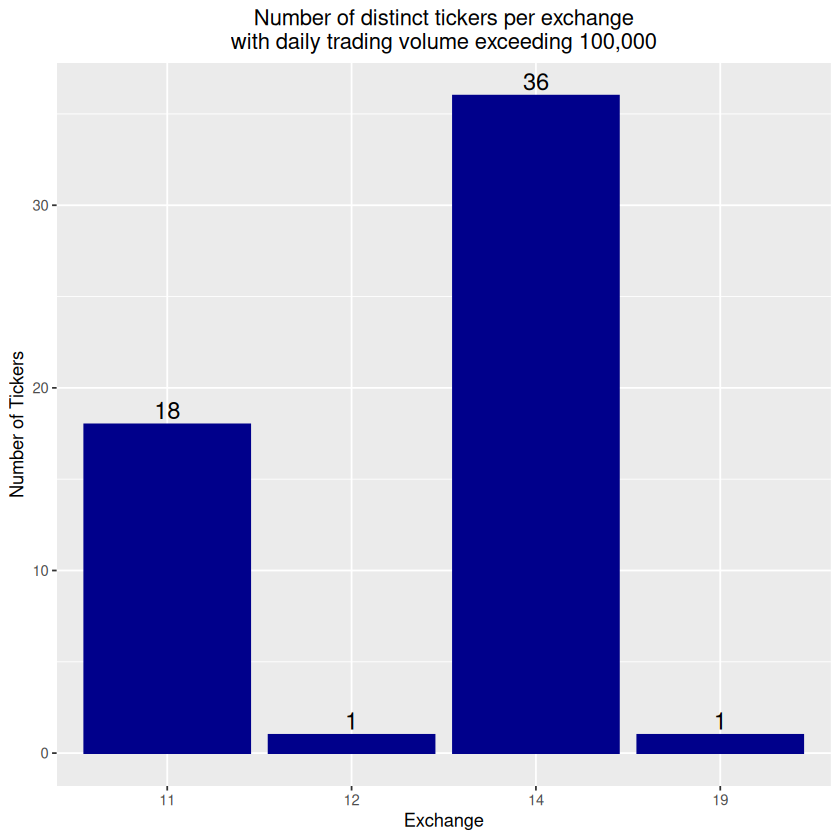

In [30]:
head(stock_data)

#creating df with tickers on each exchange with one trading day of more than 100000
df_ticker_hvolume <- filter(stock_data, cshtrd>100000)
head(df_ticker_hvolume)

df_exch_tickr <- summarise(group_by(stock_data, exchg), unique_tic = n_distinct(tic))

head(df_exch_tickr)

#plotting no of unique tickers on exchange with daily trading volume >100'000
ggplot(df_exch_tickr, aes(factor(exchg), unique_tic)) +
  geom_bar(stat = "identity", color = "darkblue", fill = "darkblue") +
  geom_text(aes(label = unique_tic),
            vjust = -0.3,              # position above the bar
            size = 5) +               # text size
  labs(title = "Number of distinct tickers per exchange\nwith daily trading volume exceeding 100,000",
  x= "Exchange", y="Number of Tickers") +
  theme(plot.title = element_text(hjust = 0.5))







## Task 2
Visualise on one line plot the close prices of each ticker, over the period.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


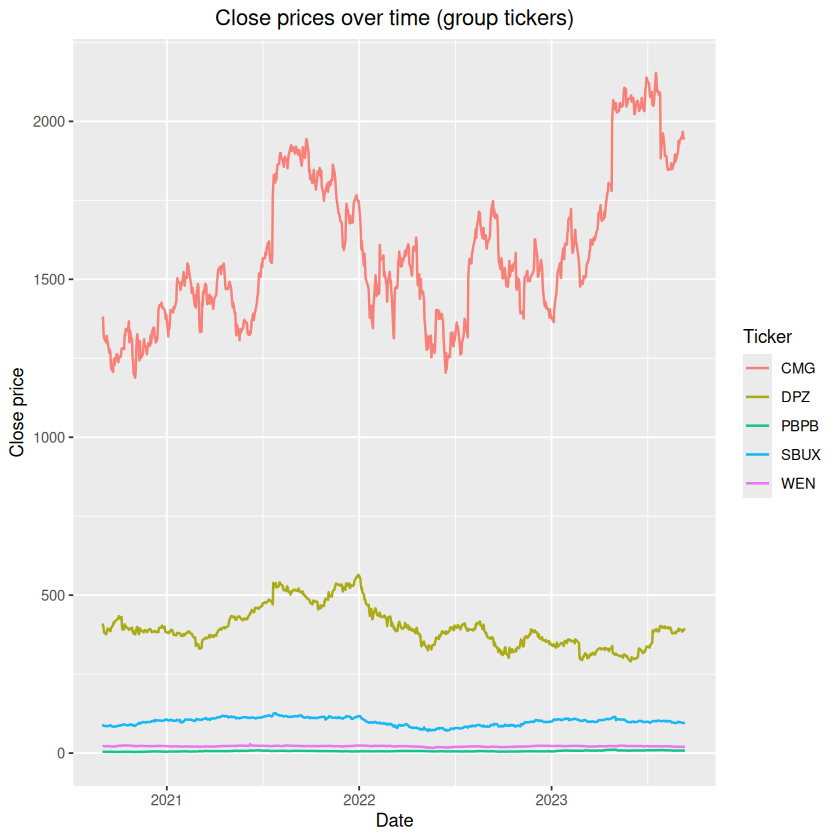

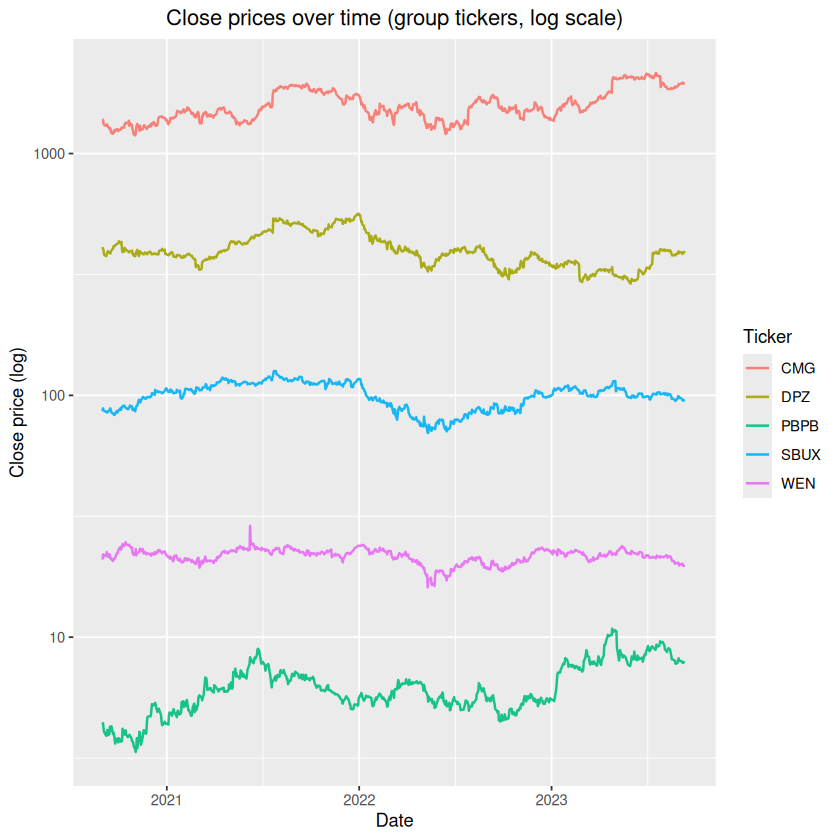

In [31]:
# step 2

# subset of our tickers
group_tickers <- c("SBUX", "WEN", "PBPB", "CMG", "DPZ")

df_group <- stock_data %>%
  filter(tic %in% group_tickers) %>%
  arrange(datadate)

# one line plot: close prices of each ticker over the period
ggplot(df_group, aes(x = datadate, y = prccd, color = tic)) +
  geom_line(size = 0.7, alpha = 0.9) +
  labs(
    title = "Close prices over time (group tickers)",
    x = "Date", y = "Close price", color = "Ticker"
  ) +
  theme(plot.title = element_text(hjust = 0.5))

# CMG prices are big numbers, thus use log
ggplot(df_group, aes(x = datadate, y = prccd, color = tic)) +
  geom_line(size = 0.7, alpha = 0.9) +
  scale_y_log10() +                             # <-- compresses CMG’s big numbers
  labs(
    title = "Close prices over time (group tickers, log scale)",
    x = "Date", y = "Close price (log)", color = "Ticker"
  ) +
  theme(plot.title = element_text(hjust = 0.5))



## Task 3
_consider only the ticker you analysed with the highest mean daily return over the period and..._

Visualise on one line plot the high and low prices, in the year 2021.

PBPB      SBUX       CMG       DPZ 
17.586207  9.834522 14.704162 14.552374

[1] "Among our five tickers,  PBPB is the one with the largest daily return."


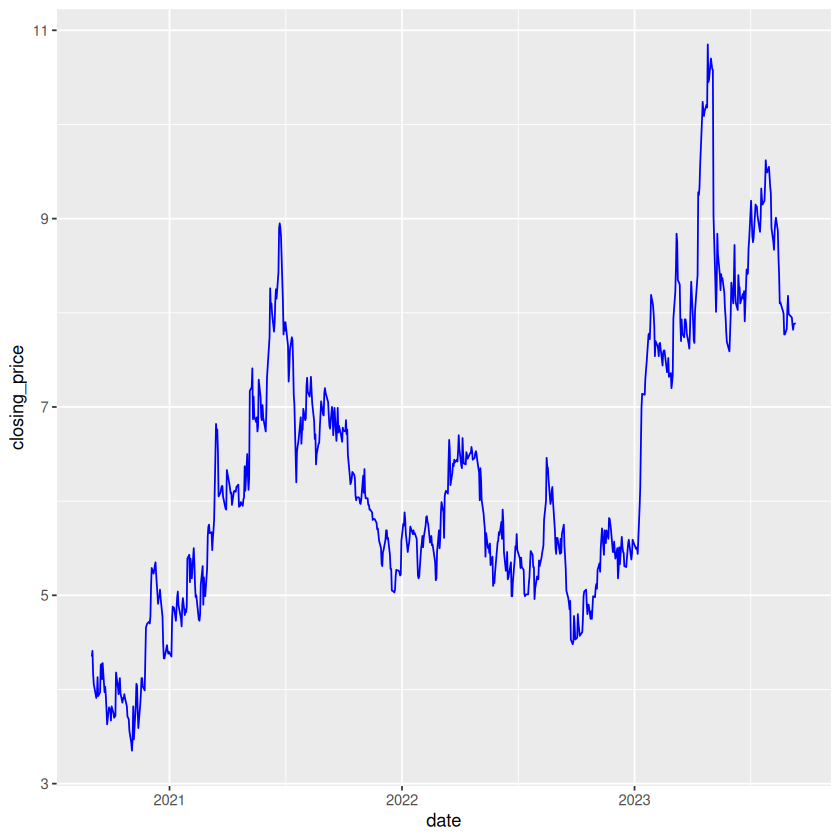

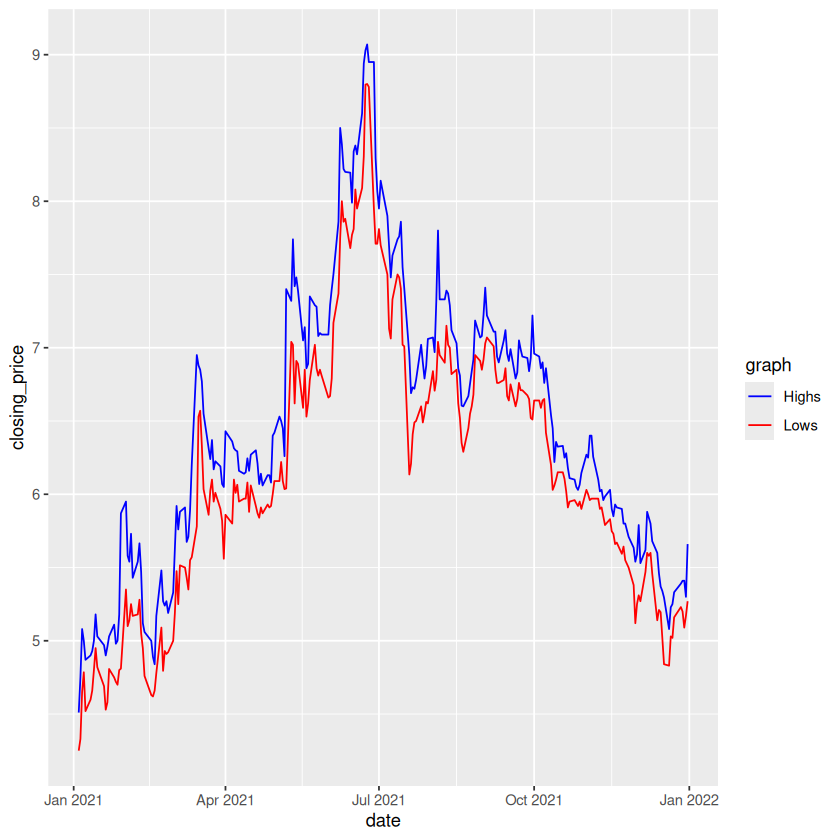

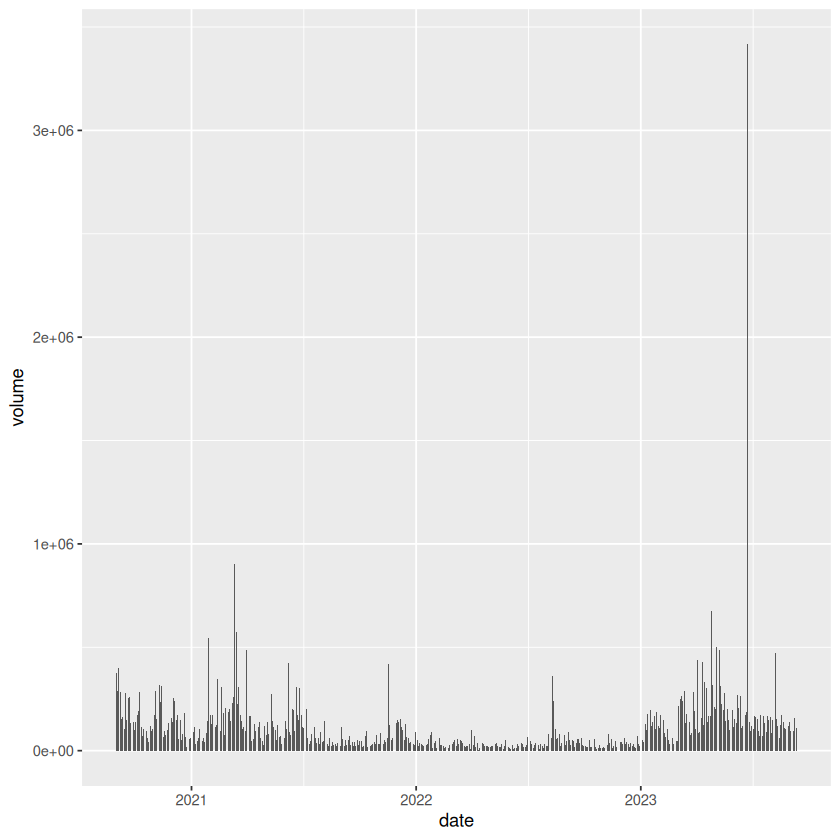

In [53]:
# Step 3 WIP

returns_vec <- c(PBPB = largest_daily_return_PBPB, SBUX = highest_return_SBUX, CMG = highest_return_CMG, DPZ = highest_return_DPZ)
head(returns_vec)
ticker_largest_d_return <- names(which.max(returns_vec))
value_largest_d_return <- max(returns_vec)

print(paste("Among our five tickers, ", ticker_largest_d_return, "is the one with the largest daily return."))

# display the stock price chart for Potbelly 
df_PBPB_prccd = data.frame(
   date = stock_data_PBPB$datadate,
   closing_price = stock_data_PBPB$prccd
   ) 

ggplot(df_PBPB_prccd, aes(x=date, y=closing_price)) +
   geom_line(color = "blue")

# display the stock price chart in terms of highs and lows for Potbelly
df_PBPB_highs = data.frame(
   date = stock_data_PBPB$datadate,
   closing_price = stock_data_PBPB$prchd,
   graph = "Highs"
   )

df_PBPB_highs <- subset(df_PBPB_highs, format(date, "%Y") == "2021")

df_PBPB_lows = data.frame(
   date = stock_data_PBPB$datadate,
   closing_price = stock_data_PBPB$prcld,
   graph = "Lows"
   )

df_PBPB_lows <- subset(df_PBPB_lows, format(date, "%Y") == "2021")

df_PBPB_high_low = rbind(df_PBPB_highs, df_PBPB_lows)
ggplot(df_PBPB_high_low, aes(x=date, y=closing_price, color=graph)) +
   geom_line() +
   scale_color_manual(values=c("Highs"="blue", "Lows"="red"))

# display the trading volume as a bar chart for Potbelly
df_PBPB_volume = data.frame(
   date = stock_data_PBPB$datadate,
   volume = stock_data_PBPB$cshtrd
   )

ggplot(df_PBPB_volume, aes(x=date, y=volume)) +
  geom_bar(stat = "identity", width=1)

# attempt crafting a scatter plot for Potbelly
